# Unsupervised and reinforcement learning in neural networks

# Kohonen maps on hand-written digits

## Dario Anongba Varela, 30 November 2016

## Project Description

For this project, our task is to understand the Kohonen algorithm and apply it to a data set of hand-written digits. A Kohonen map is an artificial neural network trained using unsupervised learning to produce a low-dimensional representation of the input space. For this exercise, our inputs consists of vectorized 28x28 images of digits so it has a dimension of 784

## Initialization (imports)

In [5]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import numpy as np
from matplotlib import pyplot as plt
from kohonen import *

#plt.rcParams['figure.figsize'] = (15.0, 10.0)

## Kohonen algorithm functions

In [10]:
def kohonen(targetdigits, size_k=6, sigma=10.0, eta=0.9, tmax=5000, threshold=1000):
    """Example for using create_data, plot_data and som_step.

    :param size_k: Size of the Kohonen map. In this case it will be 6 X 6 by default
    :param sigma: Width of the neighborhood via the width of the gaussian that describes it, 8.0 by default
    :param eta: Learning rate, 0.9 by default
    :param tmax: Maximal iteration count. 5000 by default
    :param threshold: threshold of the error for convergence criteria. 1000 by default
    """
    plb.close('all')

    dim = 28 * 28
    data_range = 255.0
    unit_of_mean = 400

    # load in data and labels
    data = np.array(np.loadtxt('data.txt'))
    labels = np.loadtxt('labels.txt')

    # this selects all data vectors that corresponds to one of the four digits
    data = data[np.logical_or.reduce([labels == x for x in targetdigits]), :]
    # filter the labels
    labels = labels[np.logical_or.reduce([labels == x for x in targetdigits])]
                
    dy, dx = data.shape
    
    # initialise the centers randomly
    centers = np.random.rand(size_k ** 2, dim) * data_range
    
    # build a neighborhood matrix
    neighbor = np.arange(size_k ** 2).reshape((size_k, size_k))

    # set the random order in which the datapoints should be presented
    i_random = np.arange(tmax) % dy
    np.random.shuffle(i_random)

    #Converge step
    last_centers = np.copy(centers)
    errors = []
    mean_errors = []
    last_errors = [0.0]
    
    etas = [eta]
    
    for t, i in enumerate(i_random):
        sigma = som_step(centers, data[i, :], neighbor, eta, sigma)
        eta = max(0.9999 * eta, 0.1)
        etas.append(eta)
        
        err = np.sum(np.sum((last_centers - centers) ** 2, 1)) * 0.01
        
        if(t > unit_of_mean):
            if(len(last_errors) >= unit_of_mean):
                last_errors.pop(0)
            last_errors.append(err)

            # Update the mean error term
            tmp_error = np.mean(last_errors)
            mean_errors.append(tmp_error)

            if(tmp_error < threshold):
                print('The algorithm converges after', t, 'iterations')
                break
                
        errors.append(err)
        last_centers = np.copy(centers)
    
    # Digit assignment given labels.txt
    digit_assignment = []
    for i in range(0, size_k ** 2):
        index = np.argmin(np.sum((data[:] - centers[i, :]) ** 2, 1))
        digit_assignment.append(labels[index])
        
    print ('Digit assignment: \n')
    print (np.resize(digit_assignment, (size_k, size_k)))
    
    # for visualization, you can use this:
    for i in range(size_k ** 2):
        plb.subplot(size_k,size_k, i + 1)

        plb.imshow(np.reshape(centers[i,:], [28, 28]),interpolation='bilinear')
        plb.axis('off')

    # leave the window open at the end of the loop
    plb.show()
    plb.draw()

    print('last sigma value:', sigma)
    
    #plt.plot(errors)
    #plt.title('Square of the errors over iterations', fontsize=20)
    #plt.ylabel('Squared errors', fontsize=18)
    #plt.xlabel('Iterations', fontsize=18)
    #plt.ylim([0, 600000])
    #plt.show()

    #plt.plot(mean_errors)
    #plt.title('Mean squared errors of the last 400 terms iterations', fontsize=20)
    #plt.ylabel('Mean squared error', fontsize=18)
    #plt.xlabel('Iterations', fontsize=18)
    #plt.show()
    
    #plt.plot(etas)
    #plt.title('Learning rates decrease over iterations', fontsize=20)
    #plt.ylabel('Learning rates', fontsize=18)
    #plt.xlabel('Iterations', fontsize=18)
    #plt.show()

## Computation of the digits given a name

In [3]:
target_digits = name2digits("Dario Anongba Varela")

print('For the following analysis, we will only the data corresponding to these four digits:')
print(target_digits)

For the following analysis, we will only the data corresponding to these four digits:
[0 4 6 9]


## Choice of learning rate and convergence criteria

First, we try with a small constant value $\eta = 0.1$, then $\eta = 1$, finally a maximal value $\eta = 10$

In [ ]:
kohonen(targetdigits=target_digits, eta=0.1)

In [ ]:
kohonen(targetdigits=target_digits, eta=1)

Now, we choose a value of $\eta = 0.7$ and decrease in each iteration. We stop the algorithm when we reach 20000 iterations or when we reach an error smaller than $\epsilon$

In [ ]:
kohonen(targetdigits=target_digits, sigma=3.0, eta=0.7, tmax=20000, threshold=5000)

Here we show the prototypes and the digit assignment

In [ ]:
kohonen(targetdigits=target_digits, sigma=2.0, eta=0.7, tmax=20000, threshold=1000)

Here we test different $\sigma$ values over a constant $w$

In [ ]:
kohonen(targetdigits=target_digits, sigma=0.5, eta=0.7, tmax=20000, threshold=500, size_k=5)
kohonen(targetdigits=target_digits, sigma=1.0, eta=0.7, tmax=20000, threshold=1000, size_k=5)
kohonen(targetdigits=target_digits, sigma=5, eta=0.7, tmax=20000, threshold=10000, size_k=5)

Here we test different $w$ values over a constant $\sigma$

In [ ]:
plt.rcParams['figure.figsize'] = (7.0, 7.0)
kohonen(targetdigits=target_digits, sigma=3, eta=0.7, tmax=20000, threshold=5000, size_k=6)

plt.rcParams['figure.figsize'] = (9.0, 9.0)
kohonen(targetdigits=target_digits, sigma=3, eta=0.7, tmax=20000, threshold=5000, size_k=9)

plt.rcParams['figure.figsize'] = (12.0, 12.0)
kohonen(targetdigits=target_digits, sigma=3, eta=0.7, tmax=20000, threshold=5000, size_k=12)

The algorithm converges after 17431 iterations
Digit assignment: 

[[ 6.  6.  0.  0.  0.  0.]
 [ 6.  6.  0.  0.  0.  0.]
 [ 6.  6.  6.  6.  6.  0.]
 [ 6.  6.  6.  4.  4.  4.]
 [ 9.  9.  4.  4.  4.  4.]
 [ 9.  9.  4.  9.  9.  4.]]


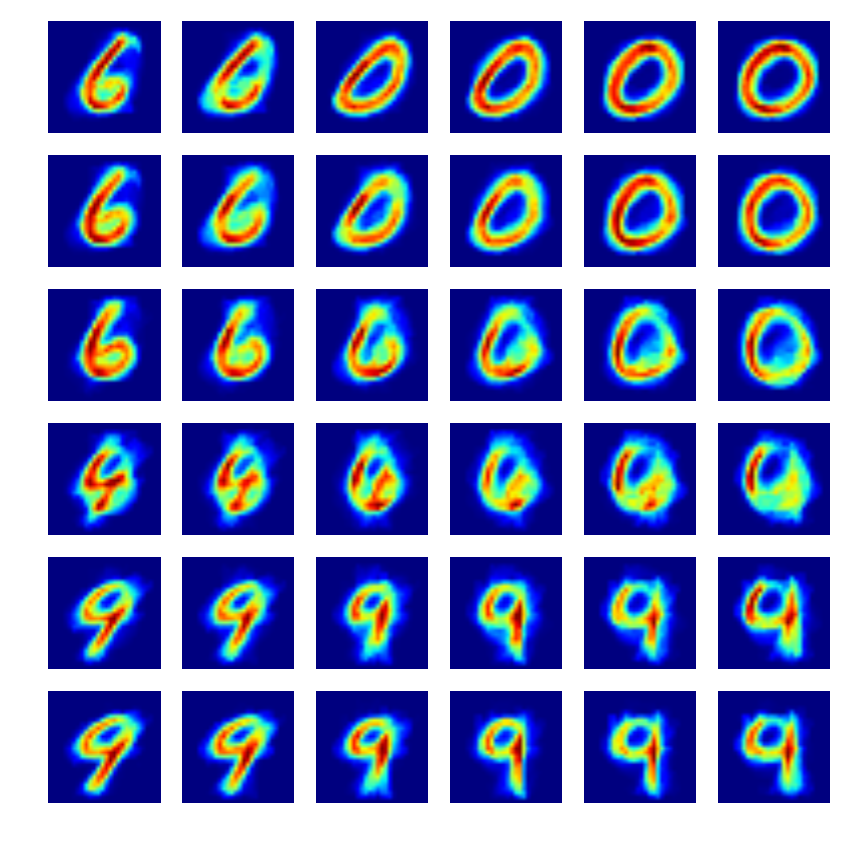

last sigma value: 1.0


In [13]:
plt.rcParams['figure.figsize'] = (7.0, 7.0)
kohonen(targetdigits=target_digits, sigma=10, eta=0.7, tmax=20000, threshold=1000)